<a href="https://colab.research.google.com/github/noelivander/AVD/blob/main/Pengaruh_Ville_ke_Emisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

Import Library

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import data dalam format CSV

In [ ]:
# Membaca data CSV
data = pd.read_csv('emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


In [ ]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y', 'Route (L/100 km)': 'A', 'kombinasi (L/100 km)': 'B'}, inplace=True)
print(data)

        X     A     B    Y
0     8.1   6.5   7.4  172
1     8.9   6.5   7.8  181
2    11.1   8.3   9.9  230
3    12.6   9.4  11.2  263
4    13.8  11.2  12.4  291
..    ...   ...   ...  ...
637   9.7   7.5   8.7  205
638  10.7   8.1   9.5  223
639  10.1   7.8   9.1  213
640  10.0   7.8   9.0  212
641  11.5   9.0  10.4  244

[642 rows x 4 columns]


# Analisis

Menghitung matriks korelasi

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

          X         A         B         Y
X  1.000000  0.909671  0.986990  0.975617
A  0.909671  1.000000  0.961539  0.951061
B  0.986990  0.961539  1.000000  0.988786
Y  0.975617  0.951061  0.988786  1.000000


Membuat matriks korelasi

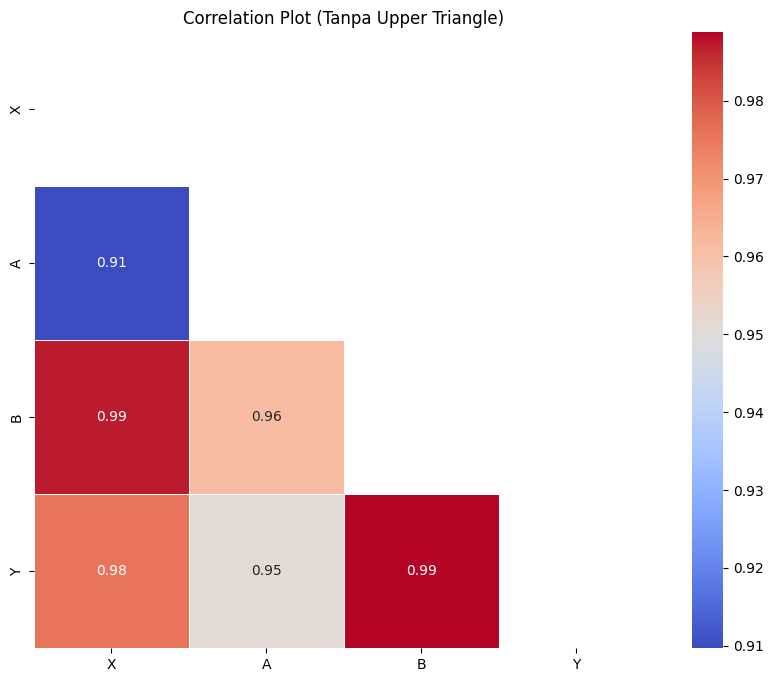

In [ ]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()


Membuat model regresi sederhana

<Axes: xlabel='X', ylabel='Y'>

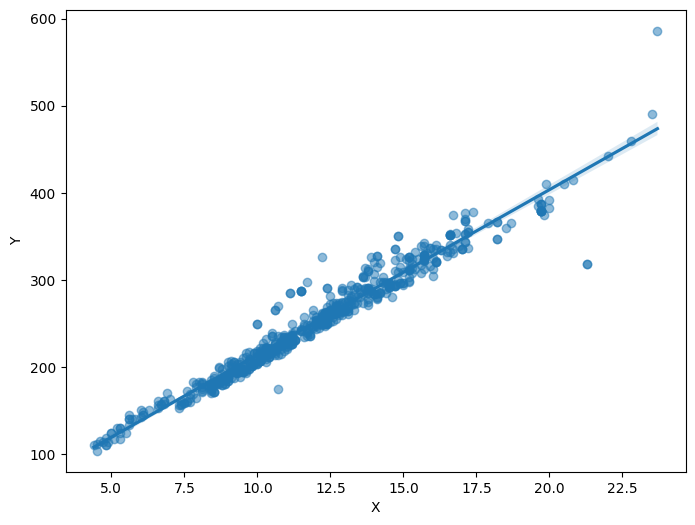

In [ ]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})


Membuat Model Regresi Sederhana

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data[["Y"]]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)


In [ ]:
X

,const,X
0,1.0,8.1
1,1.0,8.9
2,1.0,11.1
3,1.0,12.6
4,1.0,13.8
...,...,...
637,1.0,9.7
638,1.0,10.7
639,1.0,10.1
640,1.0,10.0


In [ ]:

# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:29:44   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.000      20.652      28.886
X             18.9382      0.168    112.454      0.000      18.608      19.269
==============================================================================
Omnibus:                      176.815   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.363
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      21.121   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(model)

In [ ]:
prediksi = model.predict(X)
prediksi

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


Visualisasi hasil prediksi

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

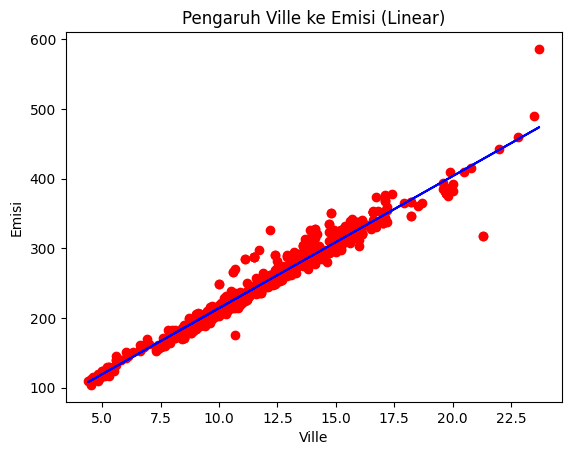

In [ ]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Pengaruh Ville ke Emisi (Linear)')
plt.xlabel('Ville')
plt.ylabel('Emisi')
plt.show()

# Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


# Membuat Model Model Regresi Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

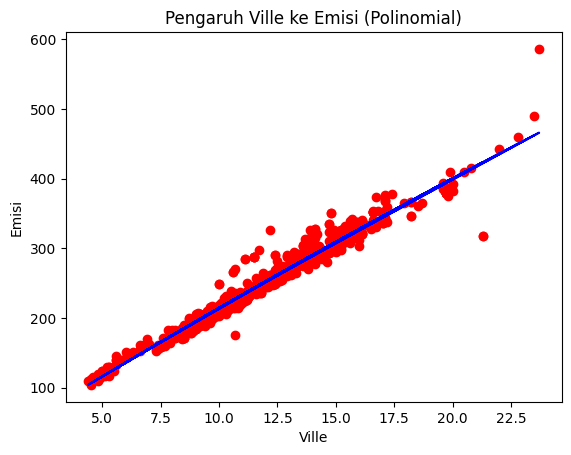

In [ ]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pengaruh Ville ke Emisi (Polinomial)')
plt.xlabel('Ville')
plt.ylabel('Emisi')
plt.show()

In [ ]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([[177.55649707],
       [193.16562068],
       [235.63198483],
       [264.20057737],
       [286.83025876],
       [233.71629137],
       [239.45920152],
       [239.45920152],
       [258.51188027],
       [214.48290248],
       [224.1169729 ],
       [229.88073422],
       [239.45920152],
       [325.95053915],
       [322.25120965],
       [314.8358697 ],
       [206.75062473],
       [216.41249672],
       [220.26751497],
       [216.41249672],
       [224.1169729 ],
       [216.41249672],
       [214.48290248],
       [231.79920784],
       [231.79920784],
       [231.79920784],
       [264.20057737],
       [227.96087052],
       [247.09695396],
       [216.41249672],
       [226.03961675],
       [226.03961675],
       [252.81067247],
       [271.76604575],
       [249.00291687],
       [269.87676378],
       [277.42555122],
       [346.19746086],
       [346.19746086],
       [346.19746086],
       [329.64430835],
       [222.19293897],
       [233.71629137],
       [233

In [ ]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")


Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521
